# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
# Install and use citipy to determine city based on latitude and longitude
# pip install citypy
from citipy import citipy


In [25]:
# Import API key
from api_keys import weather_api_key

# Read the CSV file
cities_df = "output_data/cities.csv"

In [26]:
# Define the url used and the units
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# The query URL to use
query_url = f"{url}&units={units}&appid={weather_api_key}&q="

In [27]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [28]:
# Create variables for lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(long_range[0], long_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
   #Add only unique cities
    if city not in cities:
        cities.append(city)

# Print the city count to make sure we have more than 500 countries
len(cities)

625

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [29]:
# Creating variables to use for the weather check
city_data = []
city_lat = []
city_long = []
city_max_temp = []
city_humidity = []
city_clouds = []
city_wind = []
city_country = []
city_date = []


# Information to print out
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Creating and setting counters for printing:
counter_record = 1
counter_set = 1


# Creating the loop
for i, city in enumerate(cities):
     # Create the endpoint query_url with each city:
    city_url = query_url + city
    
    
    #The counters are set to read the cities in groups of 50
    if (i % 50 == 0 and i >= 50):
        counter_set += 1
        count_record = 0
        
      
    # Printing records with set numbers and counters:
    print("Processing Record %s of Set %s | %s" % (counter_record, counter_set, city))

    # Adding 1 to the record count for printing:
    counter_record += 1

    # Running the API request for each of the cities using and except to keep the code going
    try:
        
        # Make request and store in json
        response = requests.get(city_url).json()
        
        
        city_data.append(response["name"])
        city_lat.append(response["coord"]["lat"])
        city_long.append(response["coord"]["lon"])
        city_max_temp.append(response["main"]["temp_max"])
        city_humidity.append(response["main"]["humidity"])
        city_clouds.append(response["clouds"]["all"])
        city_wind.append(response["wind"]["speed"])
        city_country.append(response["sys"]["country"])
        city_date.append(response["dt"])
      
        
    # Capturing an error and to skip the city:
    except:
       
        print("City not found. Skipping...")
        pass 
    
              
# Printing out our data log 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cape town
Processing Record 2 of Set 1 | huazolotitlan
City not found. Skipping...
Processing Record 3 of Set 1 | gueret
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | conceicao do araguaia
Processing Record 6 of Set 1 | bluff
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | mayo
Processing Record 9 of Set 1 | pochutla
Processing Record 10 of Set 1 | vostok
Processing Record 11 of Set 1 | atuona
Processing Record 12 of Set 1 | synya
Processing Record 13 of Set 1 | castro
Processing Record 14 of Set 1 | vaini
Processing Record 15 of Set 1 | bulembu
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | port blair
Processing Record 19 of Set 1 | avarua
Processing Record 20 of Set 1 | saint george
Processing Record 21 of Set 1 | lazaro cardenas
Processing Record 22 of Set 1 | taolanaro
City not found.

Processing Record 184 of Set 4 | berlevag
Processing Record 185 of Set 4 | vilyuysk
Processing Record 186 of Set 4 | hithadhoo
Processing Record 187 of Set 4 | toftir
City not found. Skipping...
Processing Record 188 of Set 4 | ventspils
Processing Record 189 of Set 4 | artigas
Processing Record 190 of Set 4 | iquique
Processing Record 191 of Set 4 | saint-denis
Processing Record 192 of Set 4 | amuntai
Processing Record 193 of Set 4 | dongfeng
Processing Record 194 of Set 4 | quatre cocos
Processing Record 195 of Set 4 | faya
Processing Record 196 of Set 4 | samusu
City not found. Skipping...
Processing Record 197 of Set 4 | shelburne
Processing Record 198 of Set 4 | santiago del estero
Processing Record 199 of Set 4 | camacha
Processing Record 200 of Set 4 | bengkulu
Processing Record 201 of Set 5 | anuradhapura
Processing Record 202 of Set 5 | tokonou
Processing Record 203 of Set 5 | cabo san lucas
Processing Record 204 of Set 5 | ciudad bolivar
Processing Record 205 of Set 5 | marco

Processing Record 363 of Set 8 | plettenberg bay
Processing Record 364 of Set 8 | marovoay
Processing Record 365 of Set 8 | saint-pierre
Processing Record 366 of Set 8 | kutum
Processing Record 367 of Set 8 | lorengau
Processing Record 368 of Set 8 | mount isa
Processing Record 369 of Set 8 | comodoro rivadavia
Processing Record 370 of Set 8 | ascension
Processing Record 371 of Set 8 | bairiki
Processing Record 372 of Set 8 | rio gallegos
Processing Record 373 of Set 8 | lebork
Processing Record 374 of Set 8 | emba
Processing Record 375 of Set 8 | tual
Processing Record 376 of Set 8 | saint-amand-les-eaux
Processing Record 377 of Set 8 | clinton
Processing Record 378 of Set 8 | byron bay
Processing Record 379 of Set 8 | preston
Processing Record 380 of Set 8 | houma
Processing Record 381 of Set 8 | rawson
Processing Record 382 of Set 8 | camaqua
Processing Record 383 of Set 8 | san quintin
Processing Record 384 of Set 8 | leningradskiy
Processing Record 385 of Set 8 | mumbwa
Processing

Processing Record 547 of Set 11 | ojinaga
Processing Record 548 of Set 11 | hambantota
Processing Record 549 of Set 11 | alyangula
Processing Record 550 of Set 11 | tura
Processing Record 551 of Set 12 | kununurra
Processing Record 552 of Set 12 | henderson
Processing Record 553 of Set 12 | bo rai
Processing Record 554 of Set 12 | tallahassee
Processing Record 555 of Set 12 | guanica
Processing Record 556 of Set 12 | roscommon
Processing Record 557 of Set 12 | ortona
Processing Record 558 of Set 12 | neepawa
Processing Record 559 of Set 12 | boda
Processing Record 560 of Set 12 | duluth
Processing Record 561 of Set 12 | swellendam
Processing Record 562 of Set 12 | garmsar
Processing Record 563 of Set 12 | bondo
Processing Record 564 of Set 12 | roald
Processing Record 565 of Set 12 | strezhevoy
Processing Record 566 of Set 12 | alofi
Processing Record 567 of Set 12 | hovd
Processing Record 568 of Set 12 | antagan
City not found. Skipping...
Processing Record 569 of Set 12 | shu
Process

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [30]:
# Creating new dataframe for cities data:
city_data_df ={
    "City": city_data, 
    "Lat": city_lat, 
    "Lng": city_long, 
    "Max Temp": city_max_temp,
    "Humidity": city_humidity,
    "Cloudiness": city_clouds,
    "Wind Speed": city_wind,
    "Country": city_country,
     "Date": city_date}

weather_df = pd.DataFrame(city_data_df)
weather_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [31]:
#visualize data
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cape Town,-33.9258,18.4232,70.12,85,52,1.01,ZA,1643757152
1,Guéret,46.1667,1.8667,41.63,99,100,5.66,FR,1643757156
2,Rikitea,-23.1203,-134.9692,78.44,69,87,5.66,PF,1643756999
3,Conceição do Araguaia,-8.2578,-49.2647,75.18,92,77,3.20,BR,1643757161
4,Bluff,-46.6000,168.3333,77.81,63,97,12.95,NZ,1643756991


In [32]:
# Exporting the city data to .csv file:

weather_df.to_csv("../output_data/city_weather.csv", index=False, header=True)
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,5.700000e+02
mean,20.481286,15.348175,48.967404,73.096491,57.968421,8.087281,1.643758e+09
std,33.944574,93.108513,31.399288,21.541381,40.269641,6.079174,5.126147e+02
min,-54.800000,-179.166700,-36.990000,9.000000,0.000000,0.000000,1.643756e+09
25%,-8.240850,-66.959300,25.435000,63.000000,13.000000,3.510000,1.643758e+09
50%,24.280050,17.755900,61.445000,77.000000,75.000000,6.565000,1.643758e+09
75%,49.366875,103.176700,75.142500,90.750000,99.750000,11.030000,1.643758e+09
max,78.218600,178.416700,92.660000,100.000000,100.000000,37.980000,1.643759e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [33]:
# Checking if there are cities where the humidity > 100%: 

weather_df.loc[weather_df["Humidity"] >= 100]["Humidity"].count()

19

In [34]:
#  Get the indices of cities that have humidity over 100%.

hum_100 = weather_df[weather_df.Humidity > 100].index
hum_100

Int64Index([], dtype='int64')

In [35]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data = weather_df.loc[weather_df['Humidity'] < 100]  
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cape Town,-33.9258,18.4232,70.12,85,52,1.01,ZA,1643757152
1,Guéret,46.1667,1.8667,41.63,99,100,5.66,FR,1643757156
2,Rikitea,-23.1203,-134.9692,78.44,69,87,5.66,PF,1643756999
3,Conceição do Araguaia,-8.2578,-49.2647,75.18,92,77,3.20,BR,1643757161
4,Bluff,-46.6000,168.3333,77.81,63,97,12.95,NZ,1643756991


In [63]:

# Export the clean_city_data into a csv:
clean_city_data.to_csv("../output_data/clean_city_data.csv", index=False, header=True)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

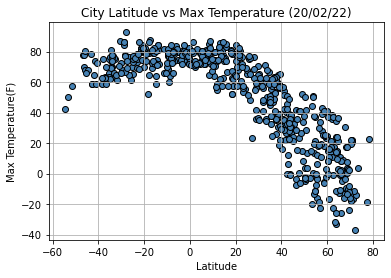

<Figure size 432x288 with 0 Axes>

In [38]:
# Latitude vs Temperature Plot

x_axis_data = clean_city_data .Lat
y_axis_data = clean_city_data ["Max Temp"]
plt.title("City Latitude vs Max Temperature (20/02/22)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.grid()

plt.scatter(x_axis_data, y_axis_data, marker = "o", facecolor = "steelblue", edgecolors="black")

plt.show()
plt.savefig("../Images/temperature.png")


## Latitude vs. Humidity Plot

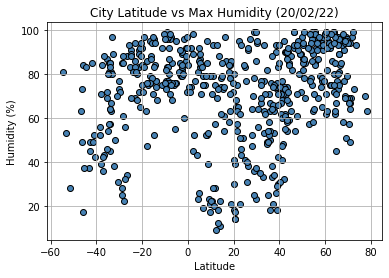

<Figure size 432x288 with 0 Axes>

In [40]:
# Latitude vs Humidity
x_axis_data = clean_city_data .Lat
y_axis_data = clean_city_data.Humidity
plt.title("City Latitude vs Max Humidity (20/02/22)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

plt.scatter(x_axis_data, y_axis_data, marker = "o", facecolor = "steelblue", edgecolors="black")

plt.show()
plt.savefig("../Images/humidity.png")


## Latitude vs. Cloudiness Plot

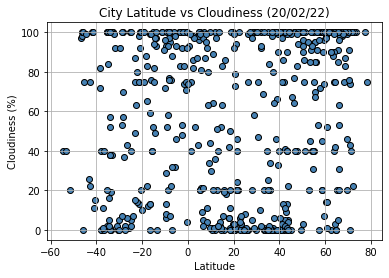

<Figure size 432x288 with 0 Axes>

In [41]:
# Latitude vs Cloudiness
x_axis_data = clean_city_data .Lat
y_axis_data = clean_city_data.Cloudiness
plt.title("City Latitude vs Cloudiness (20/02/22)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

plt.scatter(x_axis_data, y_axis_data, marker = "o", facecolor = "steelblue", edgecolors="black")

plt.show()
plt.savefig("../Images/cloudiness.png")


## Latitude vs. Wind Speed Plot

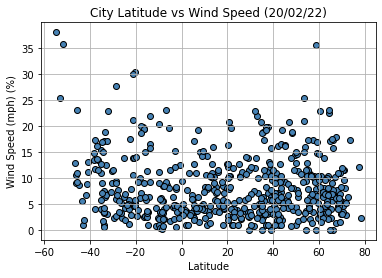

<Figure size 432x288 with 0 Axes>

In [42]:
# Latitude vs Wind Speed
x_axis_data = clean_city_data .Lat
y_axis_data = clean_city_data['Wind Speed']
plt.title("City Latitude vs Wind Speed (20/02/22)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph) (%)")
plt.grid()

plt.scatter(x_axis_data, y_axis_data, marker = "o", facecolor = "steelblue", edgecolors="black")

plt.show()
plt.savefig("../Images/windspeed.png")


## Linear Regression

In [43]:
#Dividing the data between Northern and Southern Hemispheres
north_hem = clean_city_data.loc[clean_city_data["Lat"] >= 0]
south_hem = clean_city_data.loc[clean_city_data["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7475868740968423


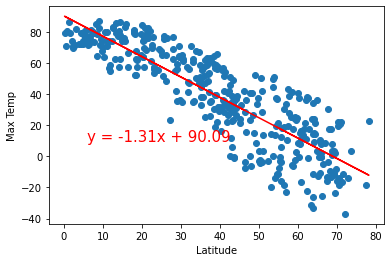

In [64]:
#Northern Hemisphere - Max Temp vs. Latitude Linear Regression
x_axis_data = north_hem.Lat
y_axis_data = north_hem['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_data, y_axis_data)
regress_values = x_axis_data * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis_data,y_axis_data)
plt.plot(x_axis_data,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.2043448379449757


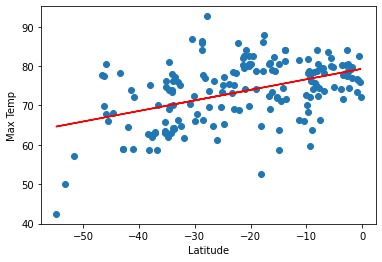

In [66]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression
x_axis_data = south_hem.Lat
y_axis_data = south_hem['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_data, y_axis_data)
regress_values = x_axis_data * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis_data,y_axis_data)
plt.plot(x_axis_data,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-svalue is: 0.14700333468508023


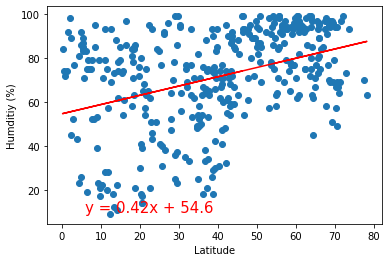

In [68]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_axis_data = north_hem.Lat
y_axis_data = north_hem.Humidity
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_data, y_axis_data)
regress_values = x_axis_data * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis_data,y_axis_data)
plt.plot(x_axis_data,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humditiy (%)')
print(f"The r-svalue is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-svalue is: 0.2569427497126604


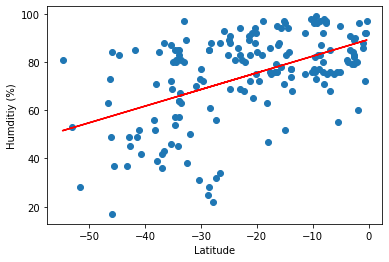

In [69]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_axis_data = south_hem.Lat
y_axis_data = south_hem.Humidity
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_data, y_axis_data)
regress_values = x_axis_data * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis_data,y_axis_data)
plt.plot(x_axis_data,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humditiy (%)')
print(f"The r-svalue is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-svalue is: 0.07326303204906578


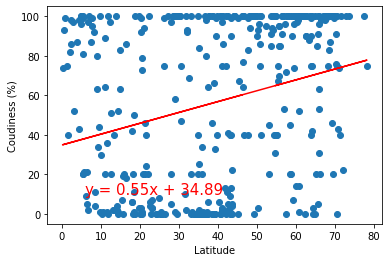

In [70]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_axis_data = north_hem.Lat
y_axis_data = north_hem.Cloudiness
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_data, y_axis_data)
regress_values = x_axis_data * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis_data,y_axis_data)
plt.plot(x_axis_data,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Coudiness (%)')
print(f"The r-svalue is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-svalue is: 0.0633683357703842


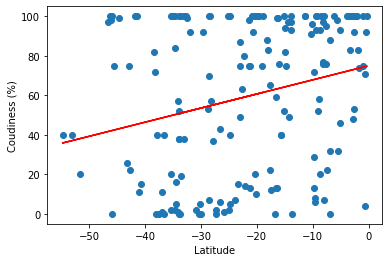

In [71]:
# ASouthern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_axis_data = south_hem.Lat
y_axis_data = south_hem.Cloudiness
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_data, y_axis_data)
regress_values = x_axis_data * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis_data,y_axis_data)
plt.plot(x_axis_data,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Coudiness (%)')
print(f"The r-svalue is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-svalue is: 0.01032119723172248


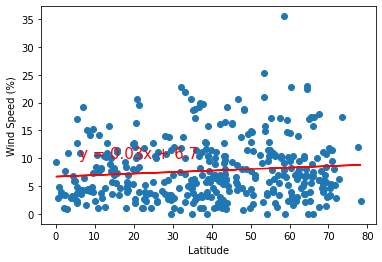

In [72]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
x_axis_data = north_hem.Lat
y_axis_data = north_hem['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_data, y_axis_data)
regress_values = x_axis_data * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis_data,y_axis_data)
plt.plot(x_axis_data,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (%)')
print(f"The r-svalue is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-svalue is: 0.09940460438582717


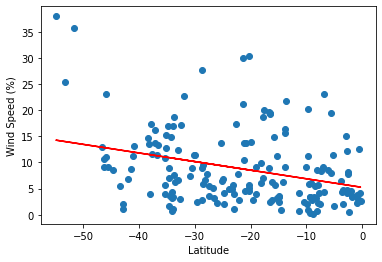

In [73]:
# Add the linear regression equation and line to plot
x_axis_data = south_hem.Lat
y_axis_data = south_hem['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_data, y_axis_data)
regress_values = x_axis_data * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis_data,y_axis_data)
plt.plot(x_axis_data,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (%)')
print(f"The r-svalue is: {rvalue**2}")
plt.show()